In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho = 28
w = 2*np.pi     # natural frequency
d = .25         # damping ratio

In [2]:
def rk4singlestep(fun, dt, t0, y0):
    """
        Long comments describing functions or other complicated
        classes can be left with the triple-quotes notation like this.
        
        This function does a single 4th-order Runge-Kutta step for ODE integration,
        where fun is the ODE, dt is the timestep, t0 is the current time, and y0 is
        the current initial condition. 
    """
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 2, y0 + (dt / 2) * f1)
    f3 = fun(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = fun(t0 + dt, y0 + dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout

In [3]:
def lorenz(t, y):
    """
        This function defines the dynamical equations
        that represent the Lorenz system. 
        
        Normally we would need to pass the values of
        sigma, beta, and rho, but we have already defined them
        globally above.
    """
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

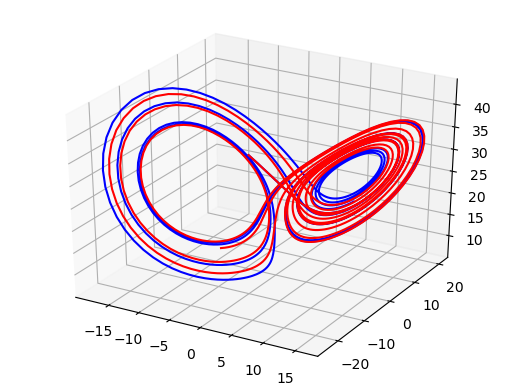

In [4]:
# Initial condition
y0 = [-8, 8, 27]

# Compute trajectory 
dt = 0.01
T = 10
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

Y = np.zeros((3, num_time_pts))
Y[:, 0] = y0
yin = y0
for i in range(num_time_pts - 1):
    yout = rk4singlestep(lorenz, dt, t[i], yin)
    Y[:, i + 1] = yout
    yin = yout

ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
ax.plot(Y[0, :], Y[1, :], Y[2, :], 'b')
lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
t = lorenz_solution.t
y = lorenz_solution.y.T
ax.plot(y[:, 0], y[:, 1], y[:, 2], 'r')
plt.show()